In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import joblib
from IPython.display import Image, display
import io
import tensorflow as tf
from PIL import Image
import requests
from skimage import transform
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Uploading ML model from")
%cd "/content/drive/Shareddrives/Project 3/Project 3"

# Save your model
# import joblib
# joblib.dump(model, 'model.MRI-CNN')
# Load your model
m = joblib.load('model.MRI-CNN')
print("\n Model successfully loaded!")

Uploading ML model from
/content/drive/Shareddrives/Project 3/Project 3

 Model successfully loaded!


/content/drive/Shareddrives/Project 3/Project 3/test images for UI
Found 1111 images belonging to 4 classes.


Saving Te-me_0060.jpg to Te-me_0060 (1).jpg


User uploaded file "Te-me_0060 (1).jpg" with length 14216 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[4.7340025e-05 9.9951017e-01 4.4167248e-04 8.6634867e-07]] 



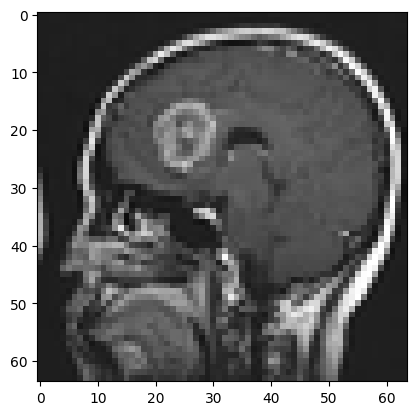



Prediction: Glioma
True Class: Meningioma


In [ ]:
# @title User Image Upload {"display-mode":"both"}
# Change dir to User Input Image folder
%cd "/content/drive/Shareddrives/Project 3/Project 3/test images for UI"
test_path = '/content/drive/Shareddrives/Project 3/Project 3/brain scans/Testing'

# Create testing data generator
datagen_test = ImageDataGenerator(rescale=1./255)
test_generator = datagen_test.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=64,  # Adjust as needed
    class_mode='categorical',  # Multi-class (4 classes)
    shuffle=False  # Don't shuffle test data
)

# Image Upload
uploaded = files.upload()
print("\n")
for fn in uploaded.keys():
     print('User uploaded file "{name}" with length {length} bytes'.format(
         name=fn, length=len(uploaded[fn])))
for filename, source in uploaded.items():
  with open(filename, 'wb') as f:
    f.write(source)

# Get the filename
filename = list(uploaded.keys())[0]

# Store image
img_input = Image.open(filename)
images, true_labels = next(test_generator)

# Define your class names
class_names = ["No Tumor", "Glioma", "Meningioma", "Pituitary"]

# Verify true label
for fn in uploaded.keys():
  if "gl" in fn:
    true_label = 1
  elif "no" in fn:
    true_label = 0
  elif "me" in fn:
    true_label = 2
  elif "pi" in fn:
    true_label = 3
  else:
    true_label = np.argmax(true_labels)

# Preprocess User-Input image
img_input = img_input.resize((64, 64), Image.LANCZOS)
float_image = np.array(img_input).astype(np.float32) / 255
reshaped_image_array = np.expand_dims(float_image, axis=0)

# Predict
result = m.predict(reshaped_image_array, batch_size=1)
print(result, "\n")

# Get the class with the highest probability for each image
result_class = np.argmax(result, axis=1)

plt.imshow((img_input))
plt.show()
print("\n")
print(f"Prediction: {class_names[result_class[0]]}")
print(f"True Class: {class_names[true_label]}")